In [1]:
import numpy as np
import matplotlib.pyplot as plt

The approximate area of intersections is 0.01207


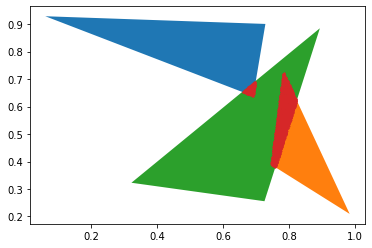

In [107]:
number_of_iterations = 300000
number_of_triangles = 3
triangles = np.random.rand(number_of_triangles, 3, 2)
points_of_intersection = []

for index in range(number_of_iterations):
    point = np.array([np.random.rand() for i in range(2)])
    
    coefficients = np.array([[(triangle[0][0] - point[0]) * \
                              (triangle[1][1] - triangle[0][1]) - \
                              (triangle[1][0] - triangle[0][0]) * \
                              (triangle[0][1] - point[1]), \
                              (triangle[1][0] - point[0]) * \
                              (triangle[2][1] - triangle[1][1]) - \
                              (triangle[2][0] - triangle[1][0]) * \
                              (triangle[1][1] - point[1]), \
                              (triangle[2][0] - point[0]) * \
                              (triangle[0][1] - triangle[2][1]) - \
                              (triangle[0][0] - triangle[2][0]) * \
                              (triangle[2][1] - point[1])] \
                             for triangle in triangles])

    number_of_intersections = 0
    
    for cur_coefs in coefficients:
        if np.all(cur_coefs > 0) or np.all(cur_coefs < 0):
            number_of_intersections += 1
    
    if number_of_intersections >= 2:
        points_of_intersection.append(point)

points_of_intersection = np.array(points_of_intersection)
ax = plt.gca()  

for triangle in triangles:
    ax.fill([point[0] for point in triangle], [point[1] for point in triangle])

plt.scatter([point[0] for point in points_of_intersection], \
            [point[1] for point in points_of_intersection], \
            s=1, zorder=2)

print(f'The approximate area of intersections is {len(points_of_intersection) / number_of_iterations}')